In [4]:
import pandas as pd

url = "https://infra.datos.gob.ar/catalog/sspm/dataset/145/distribution/145.9/download/indice-precios-al-consumidor-apertura-por-categorias-base-diciembre-2016-mensual.csv"

ds = pd.read_csv(url)

ds.head()


,indice_tiempo,ipc_nivel_general_nacional,ipc_estacionales_nacional,ipc_nucleo_nacional,ipc_regulados_nacional,ipc_nivel_general_gba,ipc_estacionales_gba,ipc_nucleo_gba,ipc_regulados_gba,ipc_nivel_general_pampeana,...,ipc_nucleo_noa,ipc_regulados_noa,ipc_nivel_general_cuyo,ipc_estacionales_cuyo,ipc_nucleo_cuyo,ipc_regulados_cuyo,ipc_nivel_general_patagonia,ipc_estacionales_patagonia,ipc_nucleo_patagonia,ipc_regulados_patagonia
0,2016-12-01,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,...,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000
1,2017-01-01,101.5859,101.6969,101.5039,101.8183,101.3130,101.5562,101.3389,101.1274,101.7874,...,101.4339,102.2777,101.7074,100.6608,101.7235,102.2456,102.5593,100.6843,101.8374,106.1556
2,2017-02-01,103.6859,102.3345,103.2105,105.9316,103.8085,102.0783,103.2097,106.3489,103.5312,...,102.9705,106.6823,103.2652,100.3694,103.1488,105.2775,104.2827,101.1740,103.5240,108.7652
3,2017-03-01,106.1476,104.7868,105.2057,110.0057,106.2627,105.8790,105.0891,109.8871,105.8173,...,105.2640,115.9572,105.9238,102.0721,105.2127,110.4082,106.5167,102.5219,105.2611,113.2246
4,2017-04-01,108.9667,108.1867,107.4270,114.4649,109.0613,108.5334,107.4973,113.8991,108.6912,...,107.4536,121.2229,109.4506,106.6856,107.6553,116.8444,108.6517,105.1970,107.0217,116.2906


In [2]:
ds.to_csv('../data/base_indec.csv')

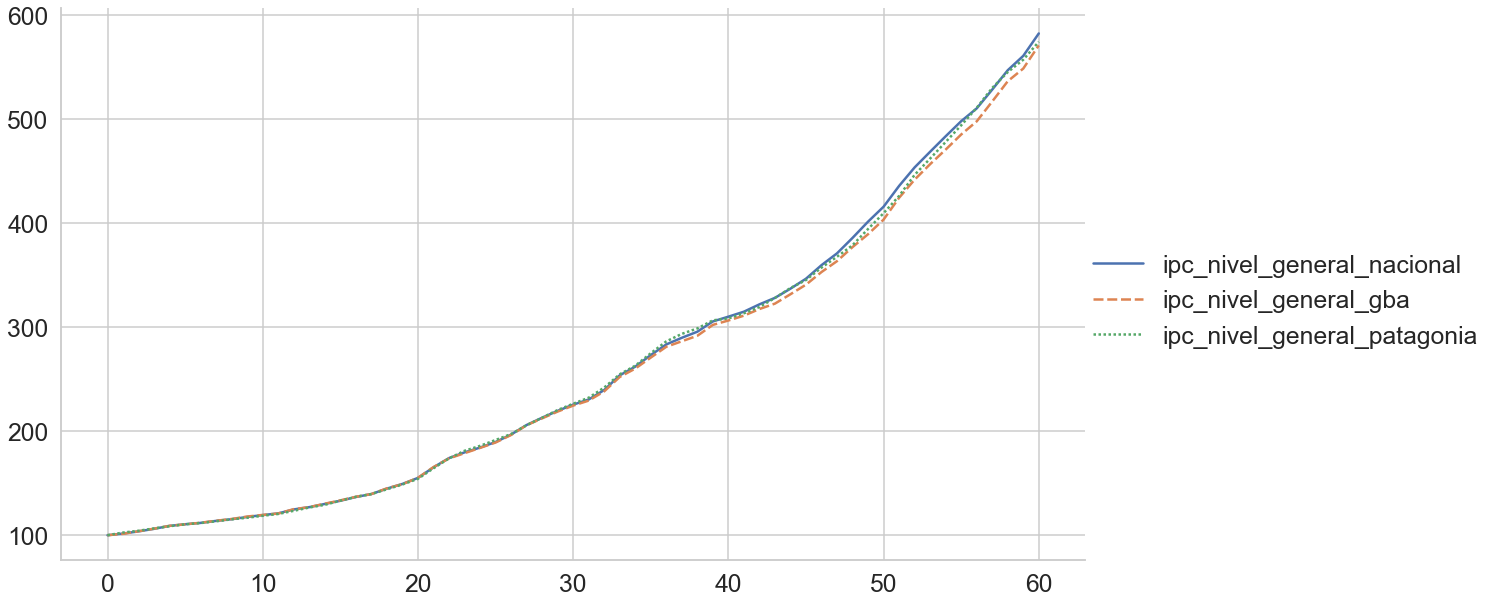

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
sns.set_context("talk", font_scale=1.5, rc={"lines.linewidth": 2.5})

sns.relplot(data=ds[['ipc_nivel_general_nacional','ipc_nivel_general_gba','ipc_nivel_general_patagonia']], kind='line',height=9, aspect=16/9)


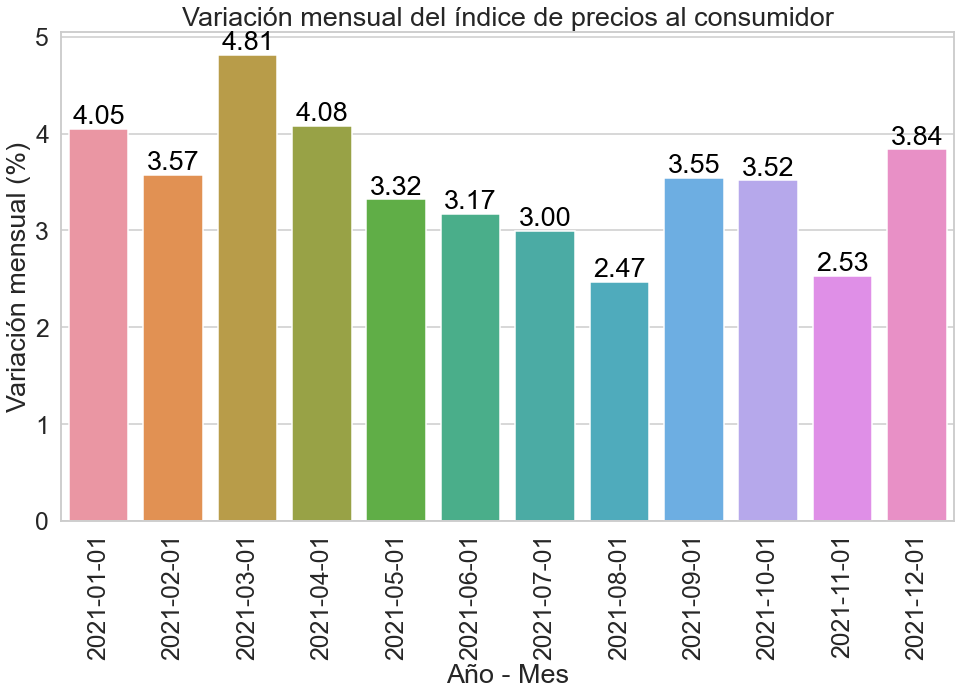

In [35]:
ds['var_mensual'] = 100 * (ds['ipc_nivel_general_nacional'] - ds['ipc_nivel_general_nacional'].shift(1)) / ds['ipc_nivel_general_nacional'].shift(1)
ds.head()

#make a barplot of the last 12 months of var_mensual 

#make a barplot with custom plot size
plt.figure(figsize=(16,9)) 
sns.barplot(x="indice_tiempo", y='var_mensual',  data=ds[-12:]) 
plt.title('Variación mensual del índice de precios al consumidor')
plt.xticks(rotation=90)
plt.ylabel('Variación mensual (%)')
plt.xlabel('Año - Mes')
#add value over the bars
for i, v in enumerate(ds['var_mensual'][-12:]):
    plt.text(i, v, '{:,.2f}'.format(v), color='black', ha='center', va='bottom')
    
plt.savefig('../img/var_mensual.png')
plt.show()

In [3]:
url = '../data/base_inflacion.txt'
ds = pd.read_csv(url)
ds.sort_values('periodo', ascending=False).head(10)

,periodo,fecha,indice,var_mensual
127,202108,2021-08-01,1.601393,0.032684
126,202107,2021-07-01,1.550710,0.029970
125,202106,2021-06-01,1.505587,0.031745
124,202105,2021-05-01,1.459262,0.033230
123,202104,2021-04-01,1.412331,0.040803
122,202103,2021-03-01,1.356963,0.048108
121,202102,2021-02-01,1.294678,0.035746
120,202101,2021-01-01,1.249995,0.040490
119,202012,2020-12-01,1.201352,0.040056
118,202011,2020-11-01,1.155085,0.031597
